# Aim :
## Predicting Stock prices of Apple, Google and Amazon
Our first aim is to predict the next day closing stock price for Apple, Google and Amazon. **For this we will train the model that learns from the data of all the 3 companies.**
## Experiment with Transfer Learning
After this we will see if we can design a model that only learns from the data of a single company (**Google**), but predicts well for the other two (**Apple and Amazon**) also. This is called **Transfer Learning**.

# Dataset : [NYSE Kaggle](https://www.kaggle.com/dgawlik/nyse)

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2021-10-24 11:14:37.482958: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-24 11:14:37.582513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 11:14:37.596633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 11:14:37.597355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [2]:
import numpy as np
import pandas 
import seaborn
import matplotlib.pyplot as plt

In [3]:
df = pandas.read_csv('prices.csv')

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
print(df.shape)

(851264, 7)


# Filtering out the dataset
Our aim will be limited to predicting **Apple, Google and Amazon stocks**. Ticker symbol for the respective companies are AAPL, GOOGL and AMZN.

In [6]:
print(df[df['symbol'] == 'AAPL'].shape)
print(df[df['symbol'] =='GOOGL'].shape)
print(df[df['symbol'] == 'AMZN'].shape)

(1762, 7)
(1762, 7)
(1762, 7)


In [7]:
main_df = df[(df['symbol'] == 'AAPL') | (df['symbol'] == 'GOOGL') | (df['symbol'] == 'AMZN')].reset_index(drop = True)

In [8]:
print('Number of missing values : ' + str(main_df.isna().sum().sum()))

Number of missing values : 0


In [9]:
main_df.head(9)

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
1,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
2,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
3,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
4,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
5,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
6,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
7,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
8,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0


# Starting and ending duration

In [10]:
print(main_df['date'].min())
print(main_df['date'].max())

2010-01-04
2016-12-30


So we have data from **4th of January, 2010** to **30th of December, 2016**

# One hot encode the symbols

In [11]:
main_df = pandas.get_dummies(main_df, columns = ['symbol'])

In [12]:
main_df.head(9)

,date,open,close,low,high,volume,symbol_AAPL,symbol_AMZN,symbol_GOOGL
0,2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0,1,0,0
1,2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0,0,1,0
2,2010-01-04,626.950006,626.750011,624.240011,629.510005,3908400.0,0,0,1
3,2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0,1,0,0
4,2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0,0,1,0
5,2010-01-05,627.180001,623.990017,621.540016,627.839984,6003300.0,0,0,1
6,2010-01-06,214.379993,210.969995,210.750004,215.230000,138040000.0,1,0,0
7,2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0,0,1,0
8,2010-01-06,625.860033,608.260035,606.360021,625.860033,7949400.0,0,0,1


In [13]:
#!pip install tabulate

In [14]:
from tabulate import tabulate
info = [[col, main_df[col].count(), main_df[col].max(), main_df[col].min()] for col in main_df.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Maximum', 'Minimum'], tablefmt= 'orgtbl'))

| Feature      |   Count | Maximum     | Minimum    |
|--------------+---------+-------------+------------|
| date         |    5286 | 2016-12-30  | 2010-01-04 |
| open         |    5286 | 1226.800064 | 90.0       |
| close        |    5286 | 1220.169982 | 90.279999  |
| low          |    5286 | 1218.60002  | 89.470001  |
| high         |    5286 | 1228.880013 | 90.699997  |
| volume       |    5286 | 470249500.0 | 520600.0   |
| symbol_AAPL  |    5286 | 1           | 0          |
| symbol_AMZN  |    5286 | 1           | 0          |
| symbol_GOOGL |    5286 | 1           | 0          |


# Exploratory Data Analysis

In [15]:
main_df = main_df.drop(['date'], axis = 1)

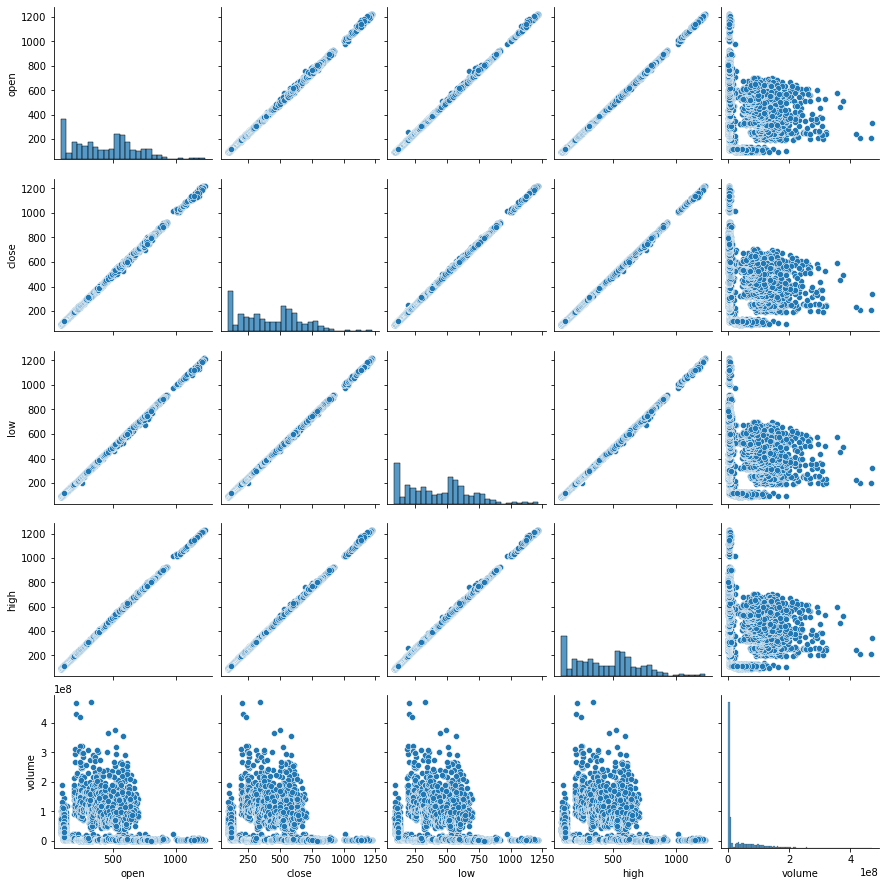

In [16]:
seaborn.pairplot(main_df.drop(['symbol_AAPL', 'symbol_AMZN', 'symbol_GOOGL'], axis = 1))

<AxesSubplot:>

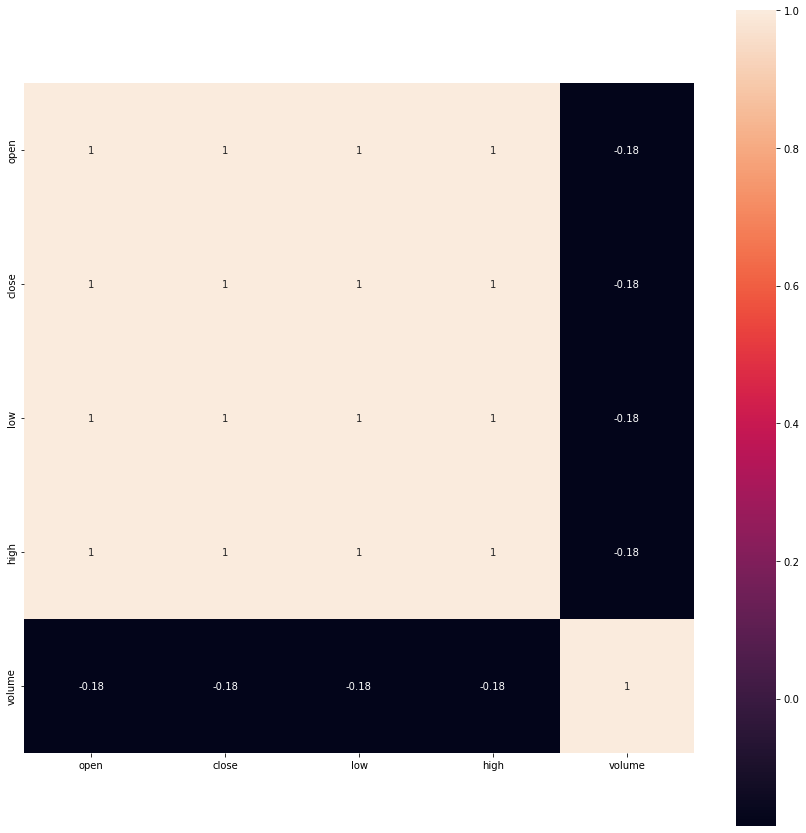

In [17]:
plt.figure(figsize = (15,15))
mat = main_df.drop(['symbol_AAPL', 'symbol_AMZN', 'symbol_GOOGL'], axis = 1).corr()
seaborn.heatmap(mat, annot = True, square = True)

In [18]:
info = ['open', 'close', 'low', 'high', 'volume']

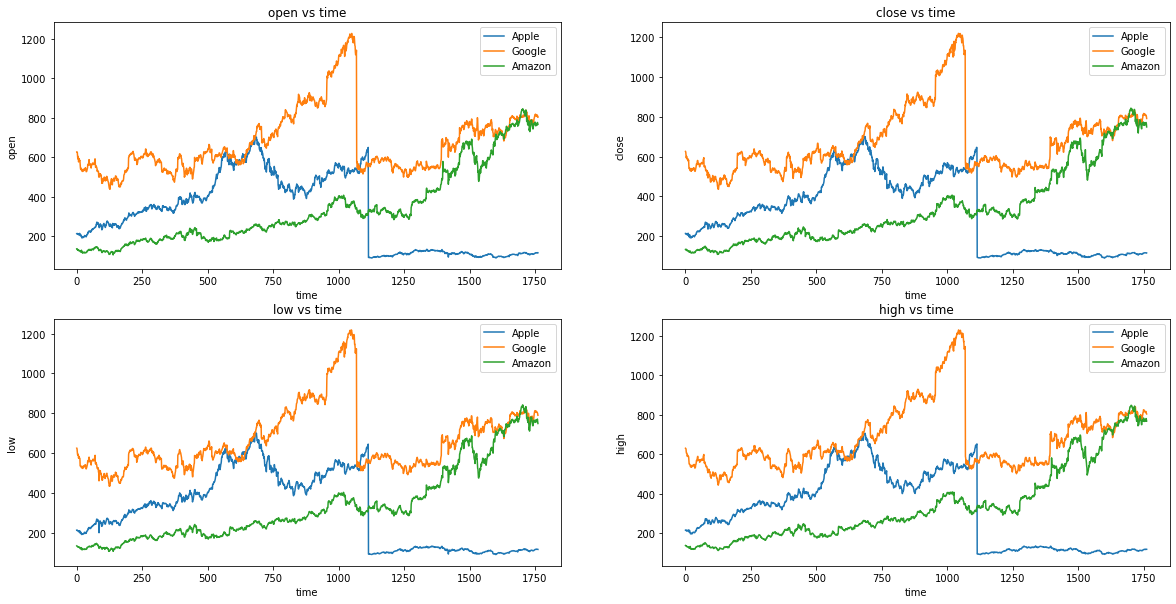

In [19]:
plt.figure(figsize = (20,10))

for i in range(4) :
    plt.subplot(2,2,i+1)
    
    plt.plot(main_df[main_df['symbol_AAPL'] == 1][info[i]].values)
    plt.plot(main_df[main_df['symbol_GOOGL']== 1][info[i]].values)
    plt.plot(main_df[main_df['symbol_AMZN'] == 1][info[i]].values)
    plt.xlabel('time' )
    plt.ylabel(info[i])
    plt.legend(['Apple', 'Google', 'Amazon'])
    plt.title(info[i] + ' vs time')
plt.show()

Since open price, low price, and high price are linearly correlated with closing price, only one of them will be selected to feed the model, to avoid overfitting. And the second feature will be **volume traded**.

In [20]:
info = [[col, main_df[col].count(), main_df[col].max(), main_df[col].min()] for col in main_df.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Maximum', 'Minimum'], tablefmt = 'orgtbl'))

| Feature      |   Count |       Maximum |   Minimum |
|--------------+---------+---------------+-----------|
| open         |    5286 | 1226.8        |     90    |
| close        |    5286 | 1220.17       |     90.28 |
| low          |    5286 | 1218.6        |     89.47 |
| high         |    5286 | 1228.88       |     90.7  |
| volume       |    5286 |    4.7025e+08 | 520600    |
| symbol_AAPL  |    5286 |    1          |      0    |
| symbol_AMZN  |    5286 |    1          |      0    |
| symbol_GOOGL |    5286 |    1          |      0    |


# Create the dataset
We will use past 300 days data to predict future stock prices, 100 days of stock data for each company. We will use three fields, apart from **opening price and volume traded** to symbolize the company to which the data belongs to.

In [21]:
X = np.array(main_df.drop(['close', 'low', 'high'], axis = 1))
y = np.array(main_df['close'])

In [22]:
print(X.shape)
print(y.shape)

(5286, 5)
(5286,)


# Scaling the columns

In [23]:
print(X[:3])

[[2.13429998e+02 1.23432400e+08 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.36250000e+02 7.59990000e+06 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [6.26950006e+02 3.90840000e+06 0.00000000e+00 0.00000000e+00
  1.00000000e+00]]


In [24]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [25]:
print(X[:3])

[[0.1085767  0.2616654  1.         0.         0.        ]
 [0.04068437 0.01507103 0.         1.         0.        ]
 [0.4723346  0.00721225 0.         0.         1.        ]]


In [26]:
print(y.min())
print(y.max())

90.279999
1220.169982


In [27]:
temp = MinMaxScaler().fit_transform(np.reshape(y, (len(y),1)))
y = temp.reshape(-1)

In [28]:
print(y.min())
print(y.max())

0.0
1.0


In [29]:
print(X.min())
print(X.max())

0.0
1.0


In [30]:
print(y[3:6])

[0.1098337  0.03930471 0.47235574]


# Creating the actual time series based numpy array
An **important** point to note is that we will have three outputs or target labels in y. These are the three closing prices, each for AAPL, AMAZN and GOOGL respectively.

In [31]:
X.shape

(5286, 5)

In [32]:
y.shape

(5286,)

In [33]:
len(X)

5286

In [34]:
length = 300                         # 100 days * 3 companies

X_res = []
y_res = []

for i in range(length,len(X)-2) :
    X_res.append(X[i-length:i])      # contains features for past 100 days for 3 companies.
    y_res.append(y[i:i+3])           # the next three closing prices for AAPL, AMZN, GOOGL.

X_res = np.array(X_res)
y_res = np.array(y_res)

In [35]:
print(X_res.shape)
print(y_res.shape)

(4984, 300, 5)
(4984, 3)


# Train test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X_res, y_res, test_size = 0.3, shuffle = True, random_state = 1)

In [37]:
print(X_train.shape)
print(y_train.shape)

(3488, 300, 5)
(3488, 3)


In [38]:
print(X_test.shape)
print(y_test.shape)

(1496, 300, 5)
(1496, 3)


# Model creation
### Recurrent Neural Network
Vanilla neural networks do not have a memory and so they do not take into account any past event for predictions. But this kind of model is poor when working with time series data, where there is dependency accross time. This is where RNN come in. A RNN model has **memory**, which can help in retaining past data and so the predictions are made on those basis.

### Long Short Term Memory
Simple RNN models have a **short term memory** and are not able to retain dependencies that occured long before the current state. So LSTM or **long short term memory** is used to retain those dependencies as well, using something called gated units. More info can be found [here](https://medium.com/x8-the-ai-community/understanding-recurrent-neural-networks-in-6-minutes-967ab51b94fe).

In [39]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import BatchNormalization

from keras.layers import Input

In [40]:
def lstm_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Bidirectional(LSTM(hiddenx, activation = 'tanh', return_sequences = True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [41]:
def rnn (hidden1, hidden2, hidden3) :
    
    model = Sequential()
    
    # Input Block
    model.add(Input((length, 5,)))
    
    # LSTM Block
    model.add(lstm_layer(hidden1))
    model.add(lstm_layer(hidden2))
    model.add(Bidirectional(LSTM(hidden3, activation = 'tanh', return_sequences = False)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output Block
    model.add(Dense(3, activation = 'linear'))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [42]:
model = rnn(128, 128, 32)
model.summary()

2021-10-24 11:14:56.989115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 11:14:56.989950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 11:14:56.990873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 11:14:56.991988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 11:14:56.992647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 300, 256)          138240    
_________________________________________________________________
sequential_2 (Sequential)    (None, 300, 256)          395264    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                73984     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 607,939
Trainable params: 606,787
Non-trainable params: 1,152
______________________________________________

In [43]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [44]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_data = (X_test, y_test), callbacks = [checkp])

2021-10-24 11:15:07.133855: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2021-10-24 11:15:14.753999: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


109/109 [==============================] - 26s 159ms/step - loss: 0.6910 - val_loss: 0.0572

Epoch 00001: val_loss improved from inf to 0.05725, saving model to ./result_model.h5
Epoch 2/200
109/109 [==============================] - 16s 148ms/step - loss: 0.2142 - val_loss: 0.0747

Epoch 00002: val_loss did not improve from 0.05725
Epoch 3/200
109/109 [==============================] - 16s 148ms/step - loss: 0.1467 - val_loss: 0.0965

Epoch 00003: val_loss did not improve from 0.05725
Epoch 4/200
109/109 [==============================] - 15s 139ms/step - loss: 0.1037 - val_loss: 0.0314

Epoch 00004: val_loss improved from 0.05725 to 0.03140, saving model to ./result_model.h5
Epoch 5/200
109/109 [==============================] - 17s 159ms/step - loss: 0.0734 - val_loss: 0.0185

Epoch 00005: val_loss improved from 0.03140 to 0.01846, saving model to ./result_model.h5
Epoch 6/200
109/109 [==============================] - 17s 161ms/step - loss: 0.0515 - val_loss: 0.0138

Epoch 00006: v

KeyboardInterrupt: 

In [45]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs')
plt.show()

NameError: name 'history' is not defined

<Figure size 1440x360 with 0 Axes>

In [41]:
from keras.models import load_model
model = load_model('./result_model.h5')

# Prediction

In [42]:
pred = model.predict(X_test)

In [43]:
print(pred.shape)

(1496, 3)


# Performance Metrics
#### Mean Squared Error
Sum of squares of differences between actual value and predicted value, divided by the total number of samples. This is an **absolute measure**.
#### R-squared score
Basically this metric evaluates how well the model performs compared to predicting mean for every sample. This is a **relative measure**.

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
print('mean squared error : ' + str(mean_squared_error(y_test, pred)))
print('r2_score : ' + str(r2_score(y_test, pred)))

mean squared error : 0.00022330144377804979
r2_score : 0.9951383690272525


# Plot the Prediction and Test value

Text(0.5, 1.0, 'Comparison in closing prices for Google')

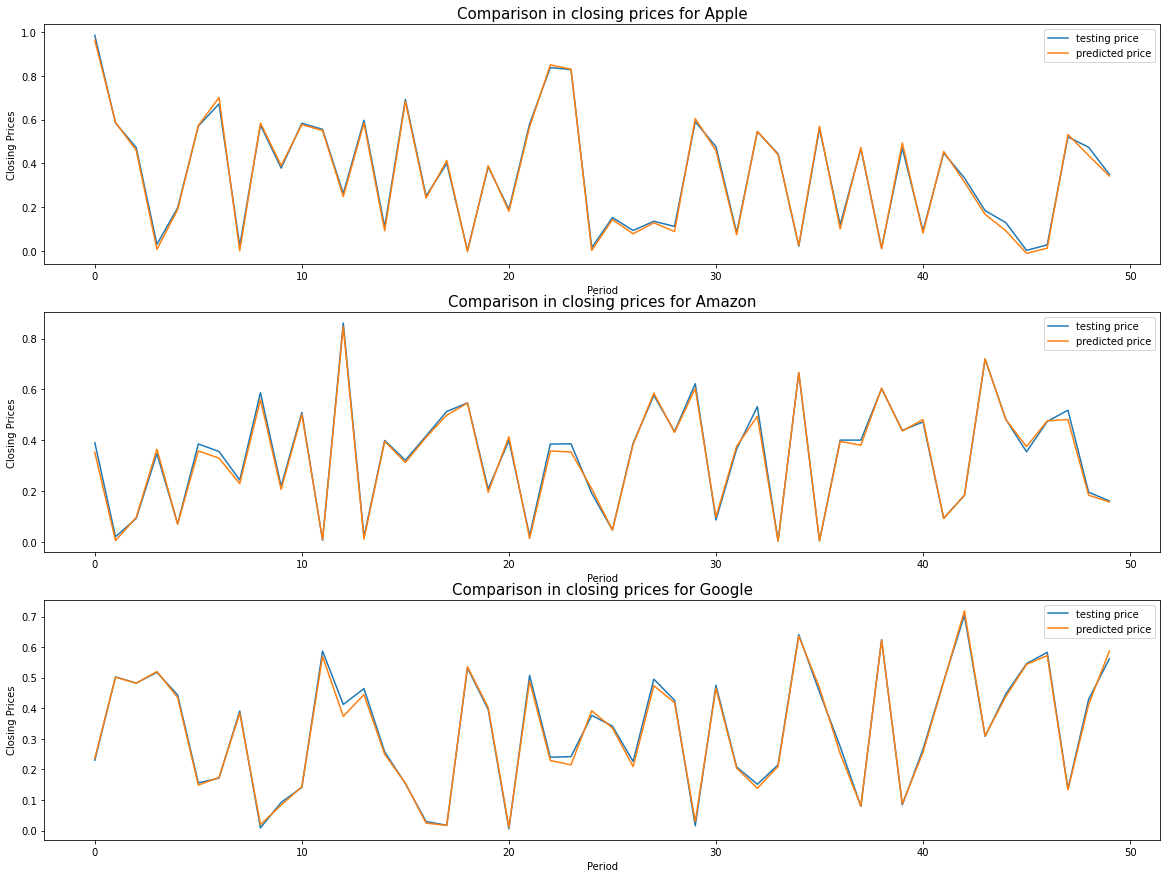

In [45]:
plt.figure(figsize = (20,15))

plt.subplot(3,1,1)
plt.plot(y_test[:50,0])
plt.plot(pred[:50,0])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Apple', fontsize = 15)


plt.subplot(3,1,2)
plt.plot(y_test[:50,1])
plt.plot(pred[:50,1])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Amazon',fontsize = 15)


plt.subplot(3,1,3)
plt.plot(y_test[:50,2])
plt.plot(pred[:50,2])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Google',fontsize = 15)

# Transfer learning

In [46]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pandas.read_csv('../input/nyse/prices.csv')

In [48]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# Taking stock price data of Google

In [49]:
df = df[df['symbol'] == 'GOOGL'].reset_index(drop = True)

In [50]:
df.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
1,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
3,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
4,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


In [51]:
df = df.drop(['symbol'], axis = 1)

In [52]:
print('Starting date : ' + str(df['date'].min()))
print('Lasting date  : ' + str(df['date'].max()))

Starting date : 2010-01-04
Lasting date  : 2016-12-30


So the we have data from **04th January, 2010 to 30th December, 2016**.

In [53]:
print('Number of missing values : ' + str(df.isna().sum().sum()))
print(df.shape)

Number of missing values : 0
(1762, 6)


It has already been observed that features **open, close, low and high** are highly correlated, so we must drop two of them (**low and high**) and **date** column. The other feature will be **volume traded**.

In [54]:
from tabulate import tabulate

In [55]:
info = [[col, df[col].count(), df[col].max(), df[col].min()] for col in df.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Maximum', 'Minimum'], tablefmt = 'orgtbl'))

| Feature   |   Count | Maximum            | Minimum            |
|-----------+---------+--------------------+--------------------|
| date      |    1762 | 2016-12-30         | 2010-01-04         |
| open      |    1762 | 1226.800064        | 438.310006         |
| close     |    1762 | 1220.1699820000001 | 436.069999         |
| low       |    1762 | 1218.6000199999999 | 433.62999800000006 |
| high      |    1762 | 1228.8800130000002 | 442.28             |
| volume    |    1762 | 29619900.0         | 520600.0           |


In [56]:
X = np.array(df.drop(['date', 'high', 'low', 'close'], axis = 1))
y = np.array(df['close'])

In [57]:
print(X.shape)
print(y.shape)

(1762, 2)
(1762,)


# Scale

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
X = MinMaxScaler().fit_transform(X)

In [60]:
t = np.reshape(y, (len(y),1))
t = MinMaxScaler().fit_transform(t)
y = t.reshape(-1)

In [61]:
print(X.max())
print(X.min())

1.0000000000000002
0.0


In [62]:
print(y.max())
print(y.min())

1.0
0.0


# Convert to time series data

In [63]:
length = 300

X_res = []
y_res = []

for i in range(length , len(X)) :
    X_res.append(X[i-length:i])
    y_res.append(y[i])

X_res = np.array(X_res)
y_res = np.array(y_res)

In [64]:
print(X_res.shape)
print(y_res.shape)

(1462, 300, 2)
(1462,)


# Train/test split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1)

In [67]:
print(X_train.shape)
print(y_train.shape)

(1169, 300, 2)
(1169,)


In [68]:
print(X_test.shape)
print(y_test.shape)

(293, 300, 2)
(293,)


# Build the model

In [69]:
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import BatchNormalization

In [70]:
'''
def lstm_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Bidirectional(LSTM(hiddenx, activation = 'tanh', return_sequences = True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model
'''

def mod (hidden1, hidden2, hidden3) :
    
    model = Sequential()
    
    # Input layer
    model.add(Input((length, 2,)))
    
    # lstm layer
    model.add(lstm_layer(hidden1))
    model.add(lstm_layer(hidden2))
    model.add(Bidirectional(LSTM(hidden3, activation = 'tanh', return_sequences = False)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # output layer
    model.add(Dense(1, activation = 'linear'))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    return model

In [71]:
model = mod(128, 64, 64)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 300, 256)          135168    
_________________________________________________________________
sequential_5 (Sequential)    (None, 300, 128)          164864    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 399,489
Trainable params: 398,465
Non-trainable params: 1,024
____________________________________________

# Model training

In [72]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./transfer_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [73]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32, callbacks = [checkp], validation_data = (X_test, y_test))

Epoch 1/200
37/37 [==============================] - 12s 132ms/step - loss: 1.4306 - val_loss: 0.0464

Epoch 00001: val_loss improved from inf to 0.04643, saving model to ./transfer_model.h5
Epoch 2/200
37/37 [==============================] - 3s 88ms/step - loss: 0.6536 - val_loss: 0.0329

Epoch 00002: val_loss improved from 0.04643 to 0.03286, saving model to ./transfer_model.h5
Epoch 3/200
37/37 [==============================] - 3s 88ms/step - loss: 0.5110 - val_loss: 0.0224

Epoch 00003: val_loss improved from 0.03286 to 0.02242, saving model to ./transfer_model.h5
Epoch 4/200
37/37 [==============================] - 3s 88ms/step - loss: 0.3907 - val_loss: 0.0643

Epoch 00004: val_loss did not improve from 0.02242
Epoch 5/200
37/37 [==============================] - 3s 88ms/step - loss: 0.3321 - val_loss: 0.0311

Epoch 00005: val_loss did not improve from 0.02242
Epoch 6/200
37/37 [==============================] - 3s 88ms/step - loss: 0.3351 - val_loss: 0.0158

Epoch 00006: val_l

Text(0.5, 1.0, 'Losses vs Epochs')

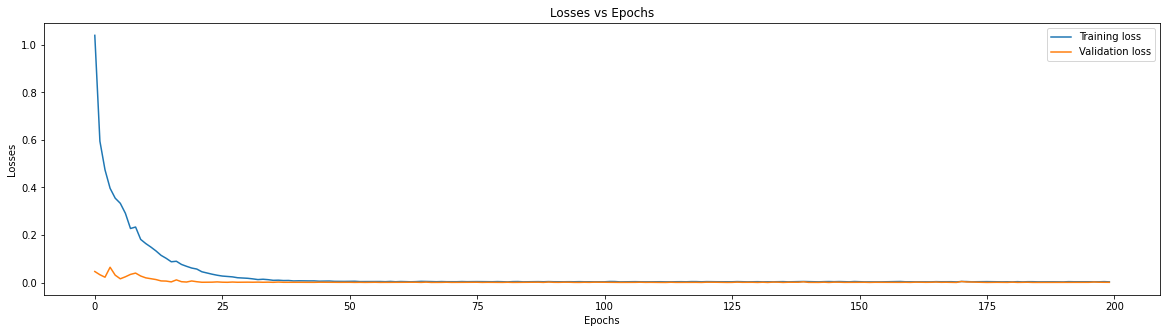

In [74]:
plt.figure(figsize = (20,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs')

# Prediction on test data

In [75]:
from keras.models import load_model
model = load_model('./transfer_model.h5')

In [76]:
pred = model.predict(X_test)

In [77]:
print(pred.shape)

(293, 1)


In [78]:
pred = pred.reshape(-1)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
print('Mean squared error : ' + str(mean_squared_error(y_test, pred)))
print('r2_score : ' + str(r2_score(y_test, pred)))

Mean squared error : 0.00043406155919096986
r2_score : 0.9909854568135865


Text(0.5, 1.0, 'Comparison b/w predicted and real closing prices (Google)')

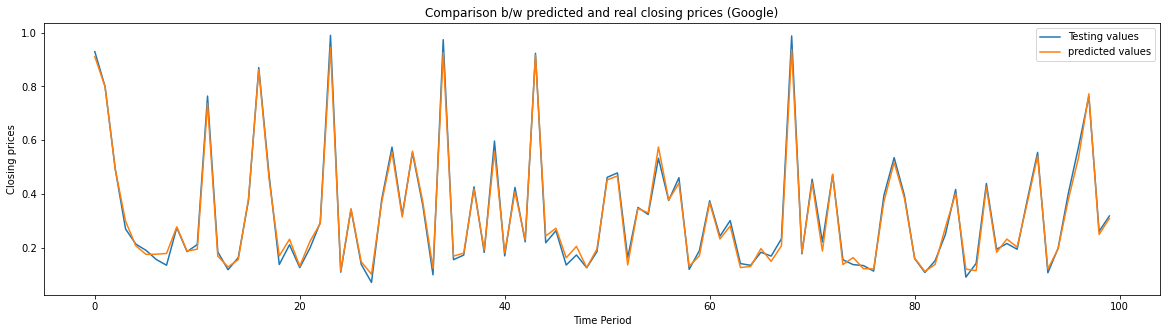

In [81]:
plt.figure(figsize = (20,5))

plt.plot(y_test[:100])
plt.plot(pred[:100])
plt.legend(['Testing values', 'predicted values'])
plt.xlabel('Time Period')
plt.ylabel('Closing prices')
plt.title('Comparison b/w predicted and real closing prices (Google)')

# Now let's evaluate model's performance on stock data of Amazon and Apple.

In [82]:
df = pandas.read_csv('../input/nyse/prices.csv')

In [83]:
apple = df[df['symbol'] == 'AAPL'].reset_index(drop = True)
amazn = df[df['symbol'] == 'AMZN'].reset_index(drop = True)

In [84]:
apple.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
1,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
2,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
3,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
4,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0


In [85]:
amazn.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
1,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
2,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
3,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
4,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [86]:
print('Apple,')
print('Number of missing values : ' + str(apple.isna().sum().sum()))
print(apple.shape)

print('Amazon')
print('Number of missing values : ' + str(amazn.isna().sum().sum()))
print(amazn.shape)

Apple,
Number of missing values : 0
(1762, 7)
Amazon
Number of missing values : 0
(1762, 7)


In [87]:
apple = apple.drop(['date', 'symbol'], axis = 1)
amazn = amazn.drop(['date', 'symbol'], axis = 1)

In [88]:
info = [[col, apple[col].count(), apple[col].max(), apple[col].min()] for col in apple.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min'], tablefmt = 'orgtbl'))

| Feature   |   Count |          Max |          Min |
|-----------+---------+--------------+--------------|
| open      |    1762 | 702.41       | 90           |
| close     |    1762 | 702.1        | 90.28        |
| low       |    1762 | 699.57       | 89.47        |
| high      |    1762 | 705.07       | 90.7         |
| volume    |    1762 |   4.7025e+08 |  1.14759e+07 |


In [89]:
info = [[col, amazn[col].count(), amazn[col].max(), amazn[col].min()] for col in amazn.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min'], tablefmt = 'orgtbl'))

| Feature   |   Count |           Max |       Min |
|-----------+---------+---------------+-----------|
| open      |    1762 | 845.79        |    105.93 |
| close     |    1762 | 844.36        |    108.61 |
| low       |    1762 | 840.6         |    105.8  |
| high      |    1762 | 847.21        |    111.29 |
| volume    |    1762 |   4.24211e+07 | 984400    |


# Create arrays
Only use **open price and volume traded**, as other features are correlated with closing price.

In [90]:
X_apple = np.array(apple.drop(['close', 'low', 'high'], axis = 1))
y_apple = np.array(apple['close'])

X_amazn = np.array(amazn.drop(['close', 'low', 'high'], axis = 1))
y_amazn = np.array(amazn['close'])

In [91]:
print(X_apple.shape)
print(y_apple.shape)

(1762, 2)
(1762,)


In [92]:
print(X_amazn.shape)
print(y_amazn.shape)

(1762, 2)
(1762,)


# Scale

In [93]:
X_apple = MinMaxScaler().fit_transform(X_apple)
X_amazn = MinMaxScaler().fit_transform(X_amazn)

In [94]:
t = np.reshape(y_apple, (len(y_apple),1))
t = MinMaxScaler().fit_transform(t)
y_apple = t.reshape(-1)

In [95]:
t = np.reshape(y_amazn, (len(y_amazn),1))
t = MinMaxScaler().fit_transform(t)
y_amazn = t.reshape(-1)

In [96]:
print(X_apple.max())
print(X_apple.min())

1.0000000000000002
0.0


In [97]:
print(y_apple.max())
print(y_apple.min())

1.0
0.0


In [98]:
print(X_amazn.max())
print(X_amazn.min())

1.0
0.0


In [99]:
print(y_amazn.max())
print(y_amazn.min())

1.0
0.0


# Verify the shapes

In [100]:
print(X_apple.shape)
print(y_apple.shape)

(1762, 2)
(1762,)


In [101]:
print(X_amazn.shape)
print(y_amazn.shape)

(1762, 2)
(1762,)


# Create timesteps of size 300

In [102]:
length = 300

X_res_apple = []
y_res_apple = []

X_res_amazn = []
y_res_amazn = []

In [103]:
for i in range(length, len(X_apple)) :
    
    X_res_apple.append(X_apple[i-length:i])            # take 300 prior data for apple stock
    y_res_apple.append(y_apple[i])                     # next day closing price
    
    X_res_amazn.append(X_amazn[i-length:i])            # take 300 prior data for Amazonstock
    y_res_amazn.append(y_amazn[i])                     # next day closing price

X_res_apple, y_res_apple = np.array(X_res_apple), np.array(y_res_apple)
X_res_amazn, y_res_amazn = np.array(X_res_amazn), np.array(y_res_amazn)

In [104]:
print(X_res_apple.shape)
print(y_res_apple.shape)

(1462, 300, 2)
(1462,)


In [105]:
print(X_res_amazn.shape)
print(y_res_amazn.shape)

(1462, 300, 2)
(1462,)


In [106]:
from sklearn.utils import shuffle

In [107]:
X_res_apple, y_res_apple = shuffle(X_res_apple, y_res_apple, random_state = 1)
X_res_amazn, y_res_amazn = shuffle(X_res_amazn, y_res_amazn, random_state = 1)

# Predict for apple stock data

In [135]:
from keras.models import load_model
model = load_model('./transfer_model.h5')

In [136]:
for i, layer in enumerate(model.layers) :
    if i < 5 :
        layer.trainable = False

In [137]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 300, 256)          135168    
_________________________________________________________________
sequential_5 (Sequential)    (None, 300, 128)          164864    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 399,489
Trainable params: 129
Non-trainable params: 399,360
______________________________________________

In [138]:
X_apple_train, X_apple_test, y_apple_train, y_apple_test = train_test_split(X_res_apple, y_res_apple, test_size = 0.2, random_state = 1)

In [139]:
print(X_apple_train.shape)
print(y_apple_train.shape)

(1169, 300, 2)
(1169,)


In [140]:
print(X_apple_test.shape)
print(y_apple_test.shape)

(293, 300, 2)
(293,)


### Training

In [141]:
checkp = ModelCheckpoint('./best_apple_model.h5', save_best_only = True, monitor = 'val_loss', verbose = 1)

In [142]:
history = model.fit(X_apple_train, y_apple_train, epochs = 50, batch_size = 32, validation_data = (X_apple_test, y_apple_test), callbacks = [checkp])

Epoch 1/50
37/37 [==============================] - 9s 133ms/step - loss: 0.0086 - val_loss: 0.0074

Epoch 00001: val_loss improved from inf to 0.00738, saving model to ./best_apple_model.h5
Epoch 2/50
37/37 [==============================] - 3s 90ms/step - loss: 0.0069 - val_loss: 0.0083

Epoch 00002: val_loss did not improve from 0.00738
Epoch 3/50
37/37 [==============================] - 3s 88ms/step - loss: 0.0066 - val_loss: 0.0066

Epoch 00003: val_loss improved from 0.00738 to 0.00663, saving model to ./best_apple_model.h5
Epoch 4/50
37/37 [==============================] - 3s 90ms/step - loss: 0.0063 - val_loss: 0.0028

Epoch 00004: val_loss improved from 0.00663 to 0.00276, saving model to ./best_apple_model.h5
Epoch 5/50
37/37 [==============================] - 3s 89ms/step - loss: 0.0054 - val_loss: 0.0012

Epoch 00005: val_loss improved from 0.00276 to 0.00122, saving model to ./best_apple_model.h5
Epoch 6/50
37/37 [==============================] - 3s 89ms/step - loss: 0.0

In [143]:
model = load_model('./best_apple_model.h5')
y_apple_pred = model.predict(X_apple_test)

In [144]:
print(y_apple_pred.shape)

(293, 1)


In [145]:
y_apple_pred = y_apple_pred.reshape(-1)

In [146]:
print('Apple,')
print('Mean squared error : ' + str(mean_squared_error(y_apple_test, y_apple_pred)))
print('r2 score : ' + str(r2_score(y_apple_test, y_apple_pred)))

Apple,
Mean squared error : 0.0004141831028447093
r2 score : 0.9961336854415695


### Visualization

Text(0.5, 1.0, 'Closing price comparison for Apple dataset')

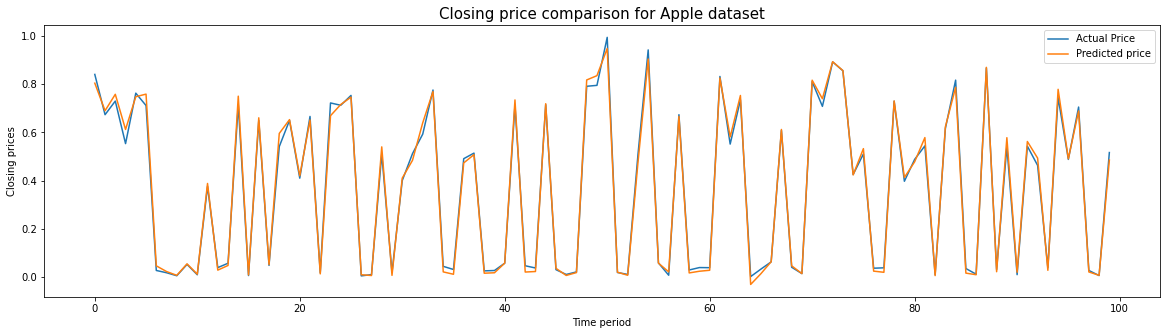

In [147]:
plt.figure(figsize = (20,5))

plt.plot(y_apple_test[100:200])
plt.plot(y_apple_pred[100:200])

plt.xlabel('Time period')
plt.ylabel('Closing prices')
plt.legend(['Actual Price', 'Predicted price'])
plt.title('Closing price comparison for Apple dataset', fontsize = 15)

# Predict for amazon stock data

In [120]:
model = load_model('./transfer_model.h5')

In [121]:
for i, layer in enumerate(model.layers) :
    if i < 5 :
        layer.trainable = False

In [122]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 300, 256)          135168    
_________________________________________________________________
sequential_5 (Sequential)    (None, 300, 128)          164864    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 399,489
Trainable params: 129
Non-trainable params: 399,360
______________________________________________

In [123]:
X_amazn_train,  X_amazn_test, y_amazn_train, y_amazn_test = train_test_split(X_res_amazn, y_res_amazn, test_size = 0.2, random_state = 1)

In [124]:
print(X_amazn_train.shape)
print(y_amazn_train.shape)

(1169, 300, 2)
(1169,)


In [125]:
print(X_amazn_test.shape)
print(y_amazn_test.shape)

(293, 300, 2)
(293,)


### Train on the last layer

In [126]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./best_amazn_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [127]:
history = model.fit(X_amazn_train, y_amazn_train, epochs = 100, batch_size = 32, validation_data = (X_amazn_test, y_amazn_test), callbacks = [checkp])

Epoch 1/100
37/37 [==============================] - 10s 132ms/step - loss: 0.0046 - val_loss: 0.0020

Epoch 00001: val_loss improved from inf to 0.00200, saving model to ./best_amazn_model.h5
Epoch 2/100
37/37 [==============================] - 3s 88ms/step - loss: 0.0041 - val_loss: 0.0011

Epoch 00002: val_loss improved from 0.00200 to 0.00106, saving model to ./best_amazn_model.h5
Epoch 3/100
37/37 [==============================] - 3s 88ms/step - loss: 0.0058 - val_loss: 8.7790e-04

Epoch 00003: val_loss improved from 0.00106 to 0.00088, saving model to ./best_amazn_model.h5
Epoch 4/100
37/37 [==============================] - 3s 89ms/step - loss: 0.0029 - val_loss: 0.0015

Epoch 00004: val_loss did not improve from 0.00088
Epoch 5/100
37/37 [==============================] - 3s 88ms/step - loss: 0.0035 - val_loss: 5.1478e-04

Epoch 00005: val_loss improved from 0.00088 to 0.00051, saving model to ./best_amazn_model.h5
Epoch 6/100
37/37 [==============================] - 3s 89ms/s

### Use the 'best_amazn_model.h5' for prediction

In [128]:
model = load_model('./best_amazn_model.h5')

In [129]:
y_amazn_pred = model.predict(X_amazn_test)

In [130]:
print(y_amazn_pred.shape)

(293, 1)


In [131]:
y_amazn_pred = y_amazn_pred.reshape(-1)

In [132]:
print('Mean_sqaured_error : ' + str(mean_squared_error(y_amazn_test, y_amazn_pred)))
print('r2_score : ' + str(r2_score(y_amazn_test, y_amazn_pred)))

Mean_sqaured_error : 0.0002694880352090339
r2_score : 0.9957642250735415


### Visualization

Text(0.5, 1.0, 'Closing price comparison for Amazon dataset')

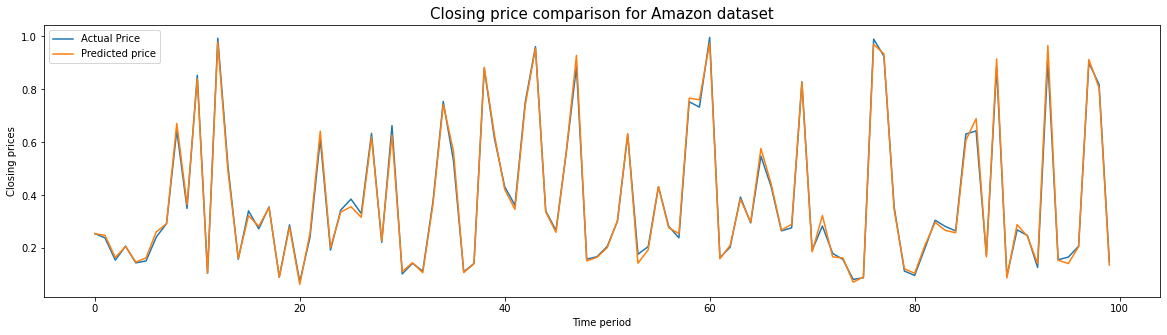

In [133]:
plt.figure(figsize = (20,5))

plt.plot(y_amazn_test[100:200])
plt.plot(y_amazn_pred[100:200])

plt.xlabel('Time period')
plt.ylabel('Closing prices')
plt.legend(['Actual Price', 'Predicted price'])
plt.title('Closing price comparison for Amazon dataset', fontsize = 15)